In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df=pd.read_csv("Downloads/Exam_Score_Prediction.csv")
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [9]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [10]:
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [12]:
df['age'].sum()

np.int64(409466)

{'whiskers': [<matplotlib.lines.Line2D at 0x213d84474d0>,
 'caps': [<matplotlib.lines.Line2D at 0x213d8447770>,
 'boxes': [<matplotlib.lines.Line2D at 0x213d8447380>],
 'medians': [<matplotlib.lines.Line2D at 0x213d8447a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x213d8447b60>],
 'means': []}

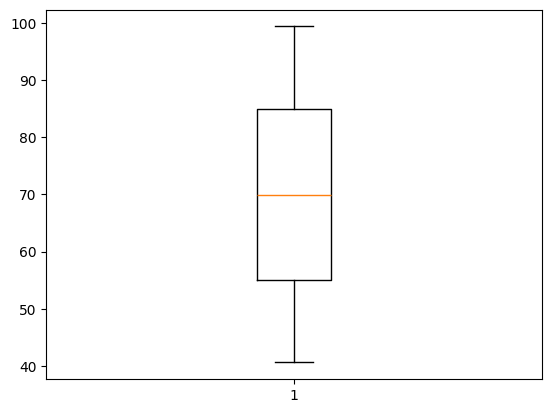

In [40]:
plt.boxplot(df['class_attendance'])

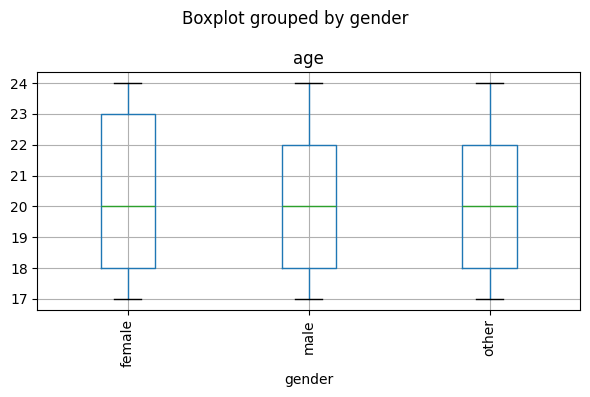

In [42]:
df.boxplot(column='age', by='gender', figsize=(6,4))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [18]:

# Show numeric columns
print(df.select_dtypes(include="number").columns)

Index(['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours',
       'exam_score'],
      dtype='object')


In [24]:



from scipy.stats import shapiro

stat, p_value = shapiro(df['age'].dropna())
print("Statistic:", stat, "p‑value:", p_value)

if p_value > 0.05:
    print("Probably normal (fail to reject)")
else:
    print("Probably not normal (reject)")


Statistic: 0.9265893909436794 p‑value: 3.7984332328895555e-70
Probably not normal (reject)


C:\Users\SHEILA\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


(array([2514., 2542., 2528.,    0., 2488., 2555.,    0., 2497., 2433.,
        2443.]),
 array([17. , 17.7, 18.4, 19.1, 19.8, 20.5, 21.2, 21.9, 22.6, 23.3, 24. ]),
 <BarContainer object of 10 artists>)

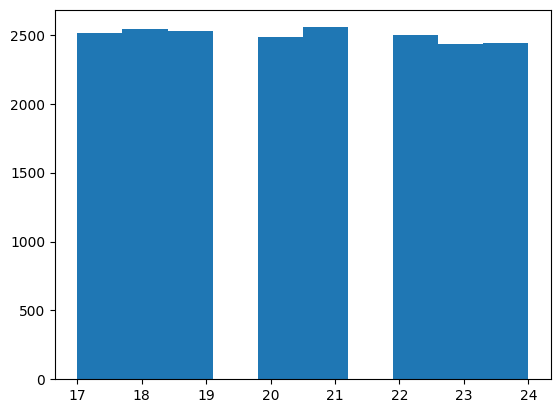

In [31]:
plt.hist(df['age'], bins=10)

In [32]:
df.isnull()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.sort_values('age')

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
19957,19959,17,other,b.tech,7.48,89.0,yes,7.9,average,coaching,low,moderate,100.0
19956,19958,17,other,b.sc,2.13,90.5,yes,4.6,poor,self-study,low,moderate,32.0
2558,2559,17,other,b.sc,2.92,91.7,no,6.1,average,mixed,medium,moderate,69.1
2555,2556,17,male,b.com,7.12,54.7,yes,8.2,average,online videos,medium,moderate,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7496,24,female,b.tech,7.15,90.0,yes,7.3,poor,self-study,low,hard,82.9
12636,12637,24,male,ba,5.34,50.7,yes,9.7,poor,self-study,high,moderate,55.8
19990,19992,24,female,b.tech,3.40,66.3,yes,8.8,poor,group study,high,easy,87.0
19971,19973,24,female,b.tech,0.62,94.9,yes,9.6,average,mixed,low,moderate,40.6


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df['age'].skew()








np.float64(0.01475180996483661)

In [10]:
import pandas as pd
corr=df["study_hours"].corr(df["exam_score"])
# compute correlation between two variables
corr = df["study_hours"] .corr(df["exam_score"])
print("Correlation between Hours and Scores:", corr)

Correlation between Hours and Scores: 0.7177879939079734


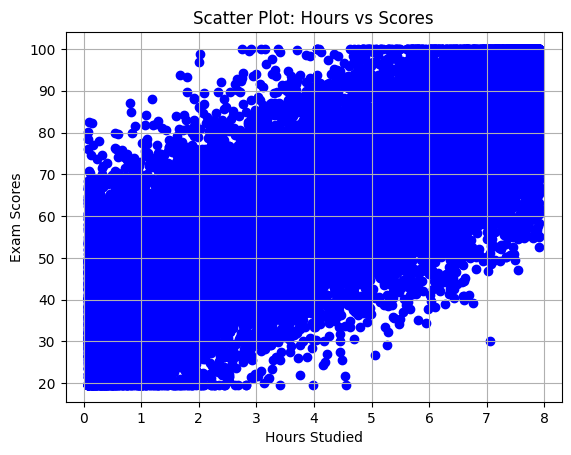

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df["study_hours"], df["exam_score"], color="blue")
plt.title("Scatter Plot: Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Scores")
plt.grid(True)
plt.show()


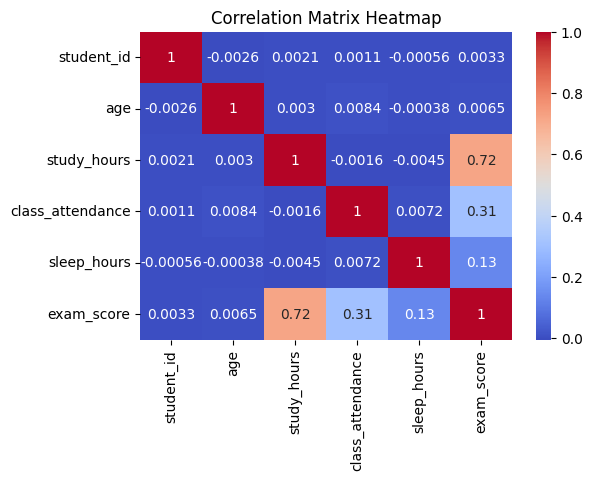

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()



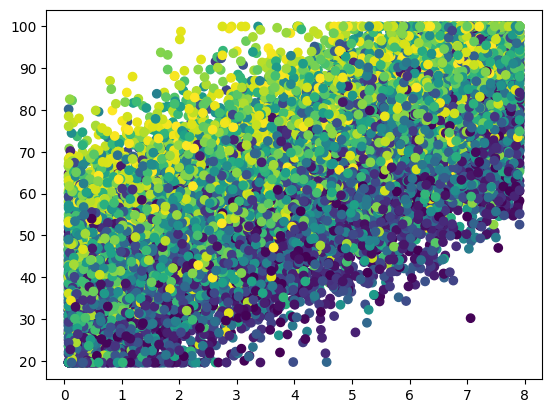

In [50]:

plt.scatter(df["study_hours"], df["exam_score"],
            c=df["class_attendance"])


<Axes: >

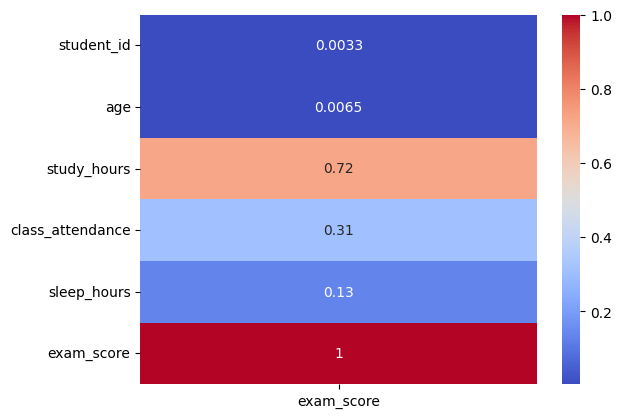

In [55]:
corr = df.corr(numeric_only=True)[['exam_score']]

sns.heatmap(corr, annot=True, cmap='coolwarm')


<Axes: >

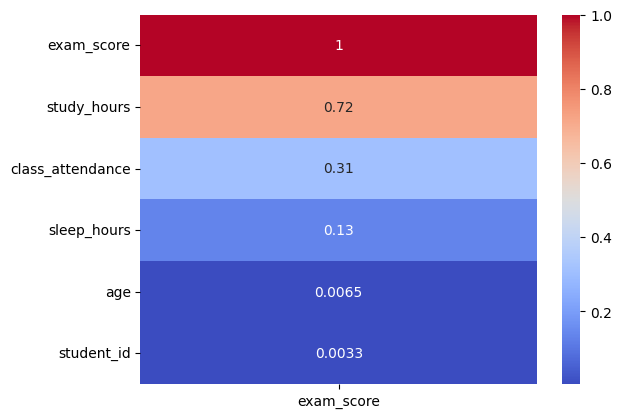

In [56]:
corr = df.corr(numeric_only=True)[['exam_score']].sort_values(
    by='exam_score', ascending=False
)

sns.heatmap(corr, annot=True, cmap='coolwarm')


In [60]:
from scipy.stats import f_oneway

g1 = df[df["gender"] == "male"]["study_hours"]
g2 = df[df["gender"] == "female"]["study_hours"]
g3 = df[df["gender"] == "other"]["study_hours"]

F_stat, p_value = f_oneway(g1, g2, g3)

print("F-statistic:", F_stat)
print("p-value:", p_value)


F-statistic: 0.2208128210269754
p-value: 0.8018687139901036


In [59]:
df.groupby("gender")["study_hours"].count()


gender
female    6579
male      6695
other     6726
Name: study_hours, dtype: int64

In [66]:
df["gender"].unique()
df["gender"].value_counts()



gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [12]:
df['course'].sample(10 , random_state=99)

3223        b.sc
6778     diploma
2088        b.sc
8681     diploma
18588       b.sc
7772      b.tech
5471         bba
13969    diploma
14334      b.com
17540       b.sc
Name: course, dtype: object

In [13]:
df.groupby("gender")["course"].sample(10, random_state=99)


7016          ba
11499         ba
18076     b.tech
15008       b.sc
12550       b.sc
1322         bba
6498         bca
12580        bba
9807         bca
13687        bca
8434       b.com
7621      b.tech
4196      b.tech
1345     diploma
15905        bca
15166     b.tech
16528        bba
7280     diploma
14534        bca
17555      b.com
7602      b.tech
2503          ba
13351      b.com
3831      b.tech
4432     diploma
5628         bca
868          bba
15618      b.com
15055    diploma
15361     b.tech
Name: course, dtype: object

In [23]:
df["age_group"] = pd.cut(
    df["age"],
    bins=[15, 18, 22, 30],
    labels=["15–18", "19–22", "23–30"]
)
print(df["age_group"])


0        15–18
1        23–30
2        19–22
3        19–22
4        19–22
         ...  
19995    15–18
19996    15–18
19997    19–22
19998    19–22
19999    19–22
Name: age_group, Length: 20000, dtype: category
Categories (3, object): ['15–18' < '19–22' < '23–30']


In [24]:
df["age_group"].value_counts()

age_group
19–22    10068
15–18     5056
23–30     4876
Name: count, dtype: int64

In [27]:
##stratified sampling
sampled_df = (
    df.groupby("age_group", observed=True)
      .sample(n=5, random_state=99)
)
print(sampled_df)

       student_id  age  gender   course  study_hours  class_attendance  \
10228       10229   17  female     b.sc         4.20              97.9   
425           426   18    male   b.tech         1.80              72.8   
14941       14942   18   other     b.sc         2.65              91.0   
16029       16030   17    male  diploma         4.10              70.5   
3560         3561   17   other       ba         5.77              77.5   
13847       13848   21   other      bca         5.70              98.5   
4818         4819   21  female    b.com         0.24              69.4   
15961       15962   20   other     b.sc         5.30              65.8   
4443         4444   20  female      bba         5.93              48.0   
12550       12551   20  female     b.sc         3.54              46.6   
16262       16263   24    male       ba         1.70              52.7   
8657         8658   23   other       ba         0.92              51.8   
10486       10487   24  female  diplom

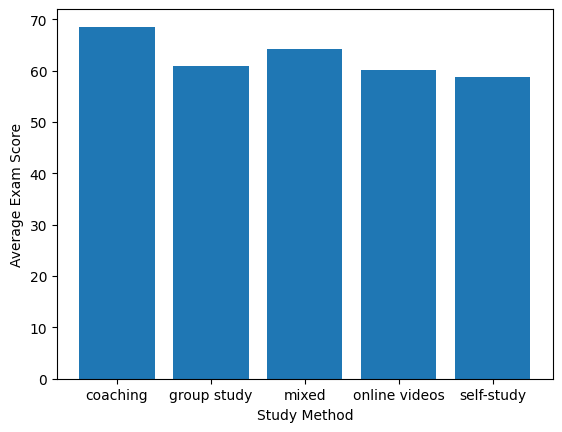

In [10]:
import matplotlib.pyplot as plt
avg_scores = df.groupby("study_method")["exam_score"].mean()
plt.bar(avg_scores.index, avg_scores.values)
plt.xlabel("Study Method")
plt.ylabel("Average Exam Score")
plt.show()

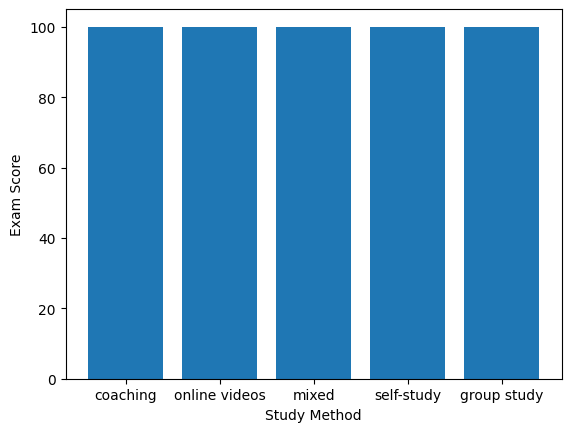

In [14]:
import matplotlib.pyplot as plt
plt.bar(df["study_method"], df["exam_score"])
plt.xlabel("Study Method")
plt.ylabel("Exam Score")
plt.show()
